In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_classification

warnings.filterwarnings('ignore')

##### abnormal detection test

In [112]:
x, y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1, weights=[0.98, 0.02], class_sep=0.5, random_state=2023)
mc_df = pd.DataFrame({'feature1':x[:,0], 'feature2':x[:,1], 'target':y})
display(mc_df)

,feature1,feature2,target
0,-0.252259,-0.401156,0
1,1.646624,-1.302046,0
2,0.427768,0.142285,0
3,0.158374,-0.043479,0
4,0.306467,-1.035549,0
...,...,...,...
9995,-2.067660,1.383269,0
9996,0.922601,-1.313713,0
9997,0.163155,0.681834,0
9998,-1.541151,0.679444,0


In [113]:
mc_df = mc_df.sort_values(by='target')
mc_df = mc_df.reset_index(drop=True)

In [114]:
display(mc_df)

,feature1,feature2,target
0,-0.252259,-0.401156,0
1,1.556339,-1.556488,0
2,-0.389439,0.754282,0
3,-0.531804,0.849507,0
4,-0.462379,0.589645,0
...,...,...,...
9995,-0.306340,-1.116807,1
9996,-0.758858,0.369217,1
9997,-0.455923,-0.606955,1
9998,-0.191751,-1.473067,1


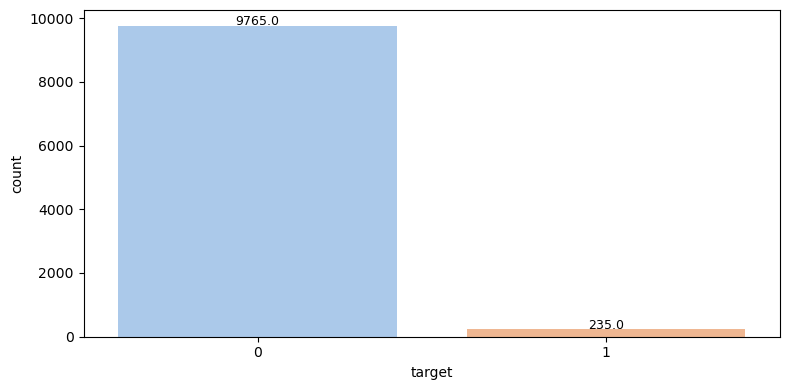

In [115]:
plt.figure(figsize=(8,4))
plt.rcParams['axes.facecolor'] = 'white'
ax = sns.countplot(x='target', data=mc_df, palette='pastel')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha='center', size=9)
plt.tight_layout()

In [116]:
x = mc_df.iloc[:, :-1]
y = mc_df.iloc[:, -1]

x_train = x[:int(0.8*len(x))]
x_test = x[int(0.8*len(x)):]
y_train = y[:int(0.8*(len(y)))]
y_test = y[int(0.8*len(y)):]

In [117]:
display(len(y_train[y_train==1]))
display(len(y_train[y_train==0]))
display(len(y_test[y_test==1]))
display(len(y_test[y_test==0]))

0

8000

235

1765

In [118]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def return_result(y_true, y_pred):
    performance = {}
    performance['accuracy'] = accuracy_score(y_true, y_pred)
    performance['precision_score'] = precision_score(y_true, y_pred)
    performance['recall_score'] = recall_score(y_true, y_pred)
    performance['f1_score'] = f1_score(y_true, y_pred)
    return performance

def cf_visual(y_true, y_pred):
    cf = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cf, annot=True, fmt='d', cmap='Reds')
    return cf

##### credit-card data practice

In [119]:
card_df = pd.read_csv('./archive/creditcard.csv')
card_df = card_df.drop('Time', axis=1)
# creditcard file is too big to upload
# https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [120]:
display(card_df)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


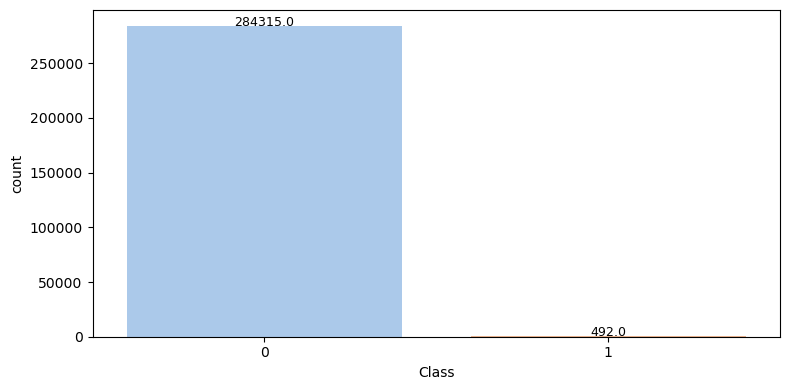

In [121]:
plt.figure(figsize=(8,4))
plt.rcParams['axes.facecolor'] = 'white'
ax = sns.countplot(x='Class', data=card_df, palette='pastel')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha='center', size=9)
plt.tight_layout()

In [122]:
card_df = card_df.sort_values(by='Class')
card_df = card_df.reset_index(drop=True)
display(card_df)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,-5.809290,0.180870,-2.698260,4.886691,1.496554,1.833805,-1.417844,-6.071499,-3.150815,1.143182,...,2.303073,-0.183163,0.049842,-0.220697,1.390550,1.035940,1.110960,-1.758895,0.76,0
2,2.136948,0.024433,-2.440339,-0.280203,0.951061,-0.799101,0.607870,-0.314005,0.054811,0.201116,...,0.152297,0.488799,-0.077620,0.236435,0.479284,0.221746,-0.099236,-0.088561,3.70,0
3,-1.156768,0.135422,3.113868,4.420894,0.757698,1.234795,-1.234156,0.721934,-1.676275,1.465244,...,0.390024,0.767668,-0.064709,0.746197,-0.080808,0.475584,0.105618,0.128784,9.81,0
4,1.767787,-0.301029,-2.215079,0.511939,0.423751,-0.984541,0.509947,-0.398095,0.540116,-0.615062,...,0.258679,0.570469,-0.257998,-0.764858,0.285443,-0.074687,-0.027915,-0.005763,174.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-9.001351,6.613284,-12.423635,7.519929,-10.266255,-2.113208,-9.984287,5.541941,-7.383705,-13.215172,...,1.775891,-1.224758,0.082594,0.452089,0.463827,-0.296928,0.526506,-0.450890,459.07,1
284803,-1.512516,1.133139,-1.601052,2.813401,-2.664503,-0.310371,-1.520895,0.852996,-1.496495,-4.056293,...,0.729828,0.485286,0.567005,0.323586,0.040871,0.825814,0.414482,0.267265,318.11,1
284804,-15.398845,7.472324,-19.026912,11.165526,-6.893856,-2.120937,-14.913330,-0.721214,-7.175097,-14.166795,...,-2.444884,0.727495,-0.345078,-0.981749,0.995271,0.816762,2.262942,-1.178063,1.00,1
284805,1.183931,3.057250,-6.161997,5.543972,1.617041,-1.848006,-1.005508,0.339937,-2.959806,-3.851722,...,0.109185,-0.931072,-0.064175,-0.007013,0.345419,0.064558,0.476629,0.323740,0.00,1


In [123]:
x1 = card_df.iloc[len(card_df)-20000:-1, :-1]
y1 = card_df.iloc[len(card_df)-20000:-1, -1]

x_train1 = x1[:int(0.8*len(x1))]
x_test1 = x1[int(0.8*len(x1)):]
y_train1 = y1[:int(0.8*len(y1))]
y_test1 = y1[int(0.8*len(y1)):]


In [124]:
display(x_train1.shape)
display(x_test1.shape)
display(y_train1.shape)
display(y_test1.shape)

(15999, 29)

(4000, 29)

(15999,)

(4000,)

In [125]:
display(len(y_train1[y_train1==1]))
display(len(y_train1[y_train1==0]))
display(len(y_test1[y_test1==1]))
display(len(y_test1[y_test1==0]))

0

15999

491

3509

##### one-class SVM(OCSVM)

In [126]:
one_class_svm = OneClassSVM(nu=0.01, kernel='rbf', gamma='auto')
one_class_svm.fit(x_train)

# kernel = ['rbf', 'poly', 'linear', 'sigmoid']
# nu = [0.001, .0.01, 0.05, 0.1, 0.25]

OneClassSVM(gamma='auto', nu=0.01)

accuracy : 0.888
precision_score : 0.6
recall_score : 0.14042553191489363
f1_score : 0.22758620689655176
[[1743   22]
 [ 202   33]]


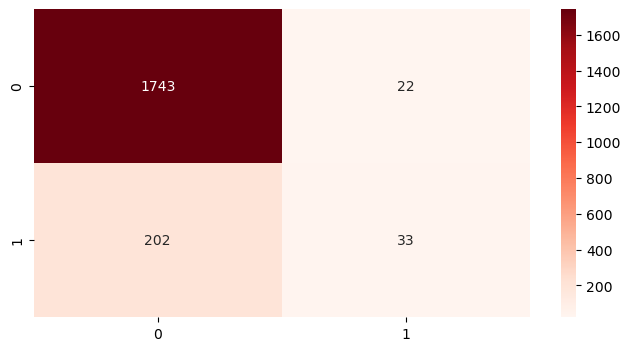

In [127]:
y_pred = one_class_svm.predict(x_test)
y_pred = [1 if i == -1 else 0 for i in y_pred]

performance = return_result(y_test, y_pred)

for k, v in performance.items():
    print(k, ':', v)

print(cf_visual(y_test, y_pred))

Best params: {'kernel': 'rbf', 'nu': 0.01}
accuracy : 0.888
precision_score : 0.6
recall_score : 0.14042553191489363
f1_score : 0.22758620689655176


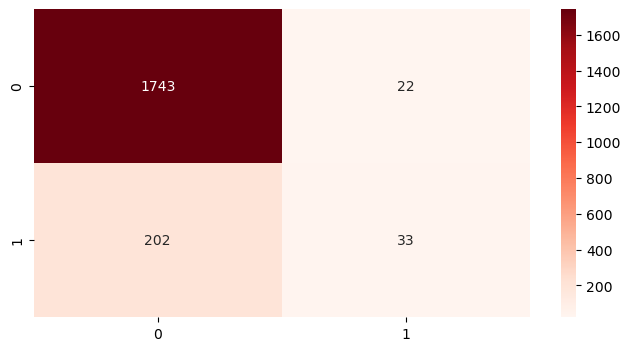

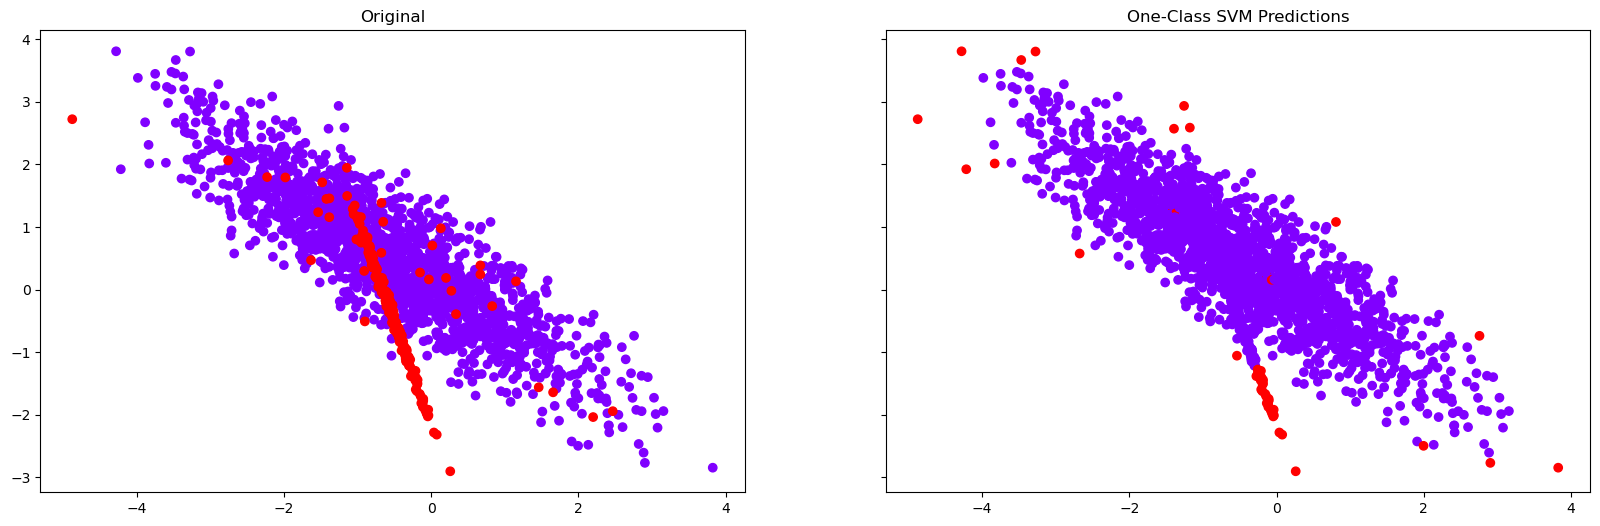

In [128]:
from sklearn.model_selection import GridSearchCV

def ocSVM_gridSearch(x, y):
    x_train = x[:int(0.8*len(x))]
    x_test = x[int(0.8*len(x)):]
    y_train = y[:int(0.8*len(y))]
    y_test = y[int(0.8*len(y)):]

    model = OneClassSVM(gamma='auto')

    param_grid = {'nu':[0.01, 0.05, 0.1, 0.2], 'kernel':['rbf', 'poly', 'linear']}

    grid_search = GridSearchCV(model, param_grid, scoring='f1_weighted', cv=5)
    grid_search.fit(x_train)

    best_params = grid_search.best_params_
    print(f'Best params: {best_params}')

    ocsvm_clf = OneClassSVM(**best_params, gamma='auto')
    ocsvm_clf.fit(x_train)

    y_pred = ocsvm_clf.predict(x_test)
    y_pred = [1 if i==-1 else 0 for i in y_pred]

    performance = return_result(y_test, y_pred)

    cf_visual(y_test, y_pred)

    for k, v in performance.items():
        print(k, ':', v)

        df_test = pd.DataFrame(x_test.iloc[:, :2], columns=['feature1', 'feature2'])
        df_test['y_test'] = y_test
        df_test['one_class_svm_prediction'] = y_pred

    fig, (ax0, ax1) = plt.subplots(1,2, sharey=True, figsize=(20,6))
    ax0.set_title('Original')
    ax0.scatter(df_test['feature1'], df_test['feature2'], c=df_test['y_test'], cmap='rainbow')
    ax1.set_title('One-Class SVM Predictions')
    ax1.scatter(df_test['feature1'], df_test['feature2'], c=df_test['one_class_svm_prediction'], cmap='rainbow')

ocSVM_gridSearch(x,y)

In [129]:
scaler = StandardScaler()
scaler.fit(x_train1)
x_train_scaled = scaler.transform(x_train1)
x_test_scaled = scaler.transform(x_test1)

In [130]:
one_class_svm = OneClassSVM(nu=0.1, kernel='rbf', gamma='auto')

In [131]:
one_class_svm.fit(x_train_scaled)

OneClassSVM(gamma='auto', nu=0.1)

In [132]:
y_pred = one_class_svm.predict(x_test_scaled)
y_pred = [1 if i==-1 else 0 for i in y_pred]

accuracy : 0.8915
precision_score : 0.5332555425904317
recall_score : 0.9307535641547862
f1_score : 0.6780415430267063
[[3109  400]
 [  34  457]]


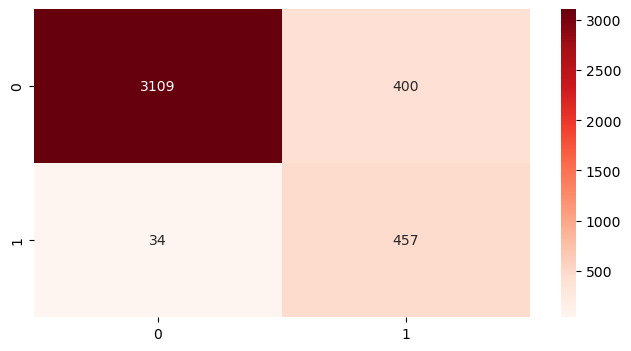

In [134]:
performance = return_result(y_test1, y_pred)

for k,v in performance.items():
    print(k, ':', v)

print(cf_visual(y_test1, y_pred))